In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# 1. Exploratory Data Analysis (EDA):
### Perform exploratory data analysis to understand the structure of the dataset.
### Check for missing values, outliers, inconsistencies in the data.

In [2]:
df = pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\Random Forest\Random Forest\glass.xlsx", sheet_name = 1)

In [3]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Box plot

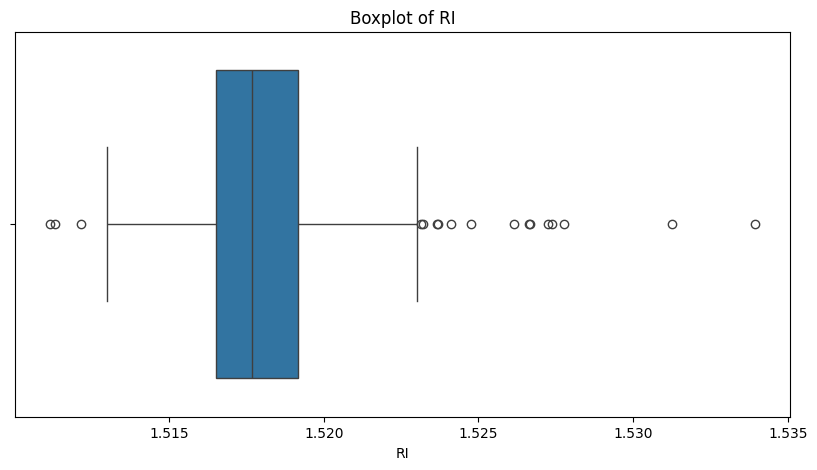

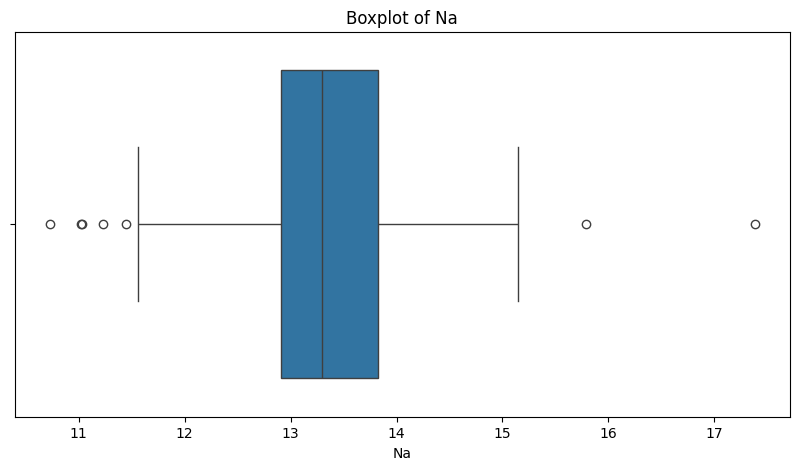

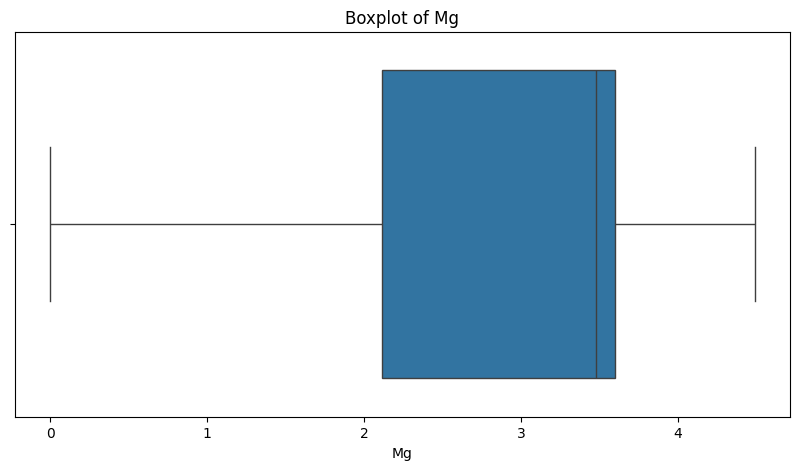

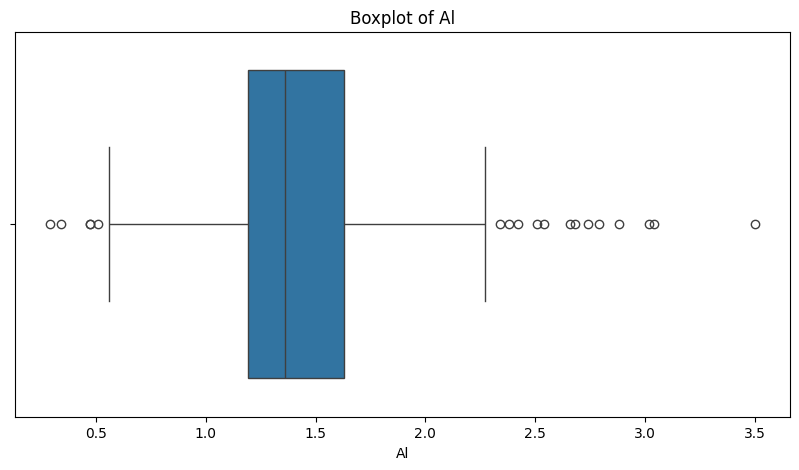

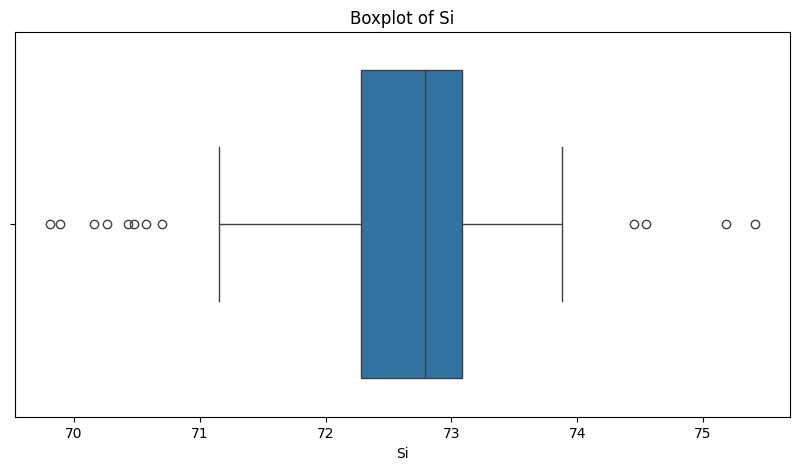

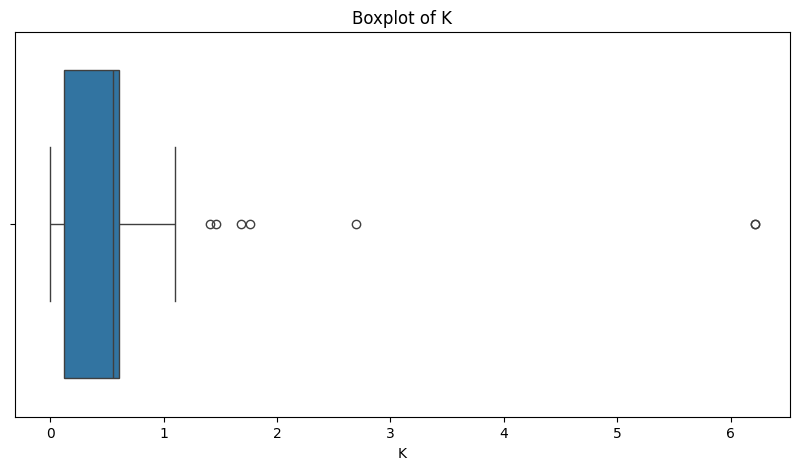

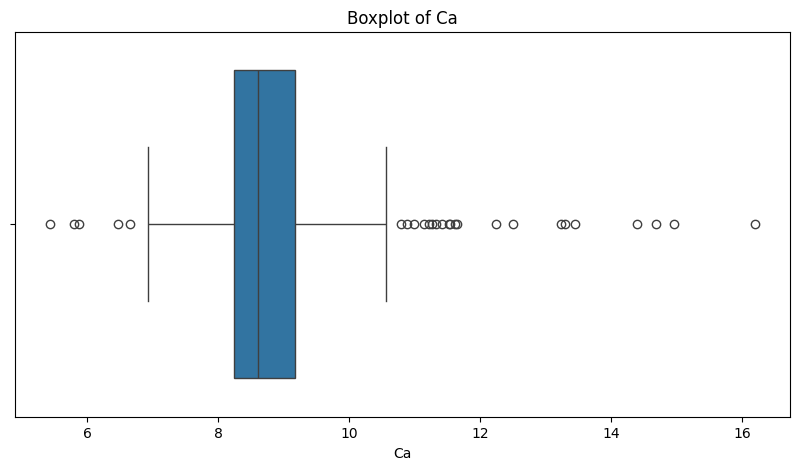

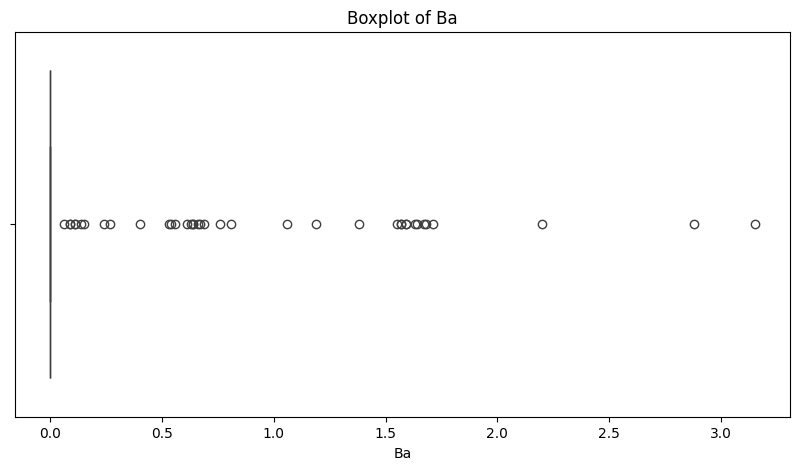

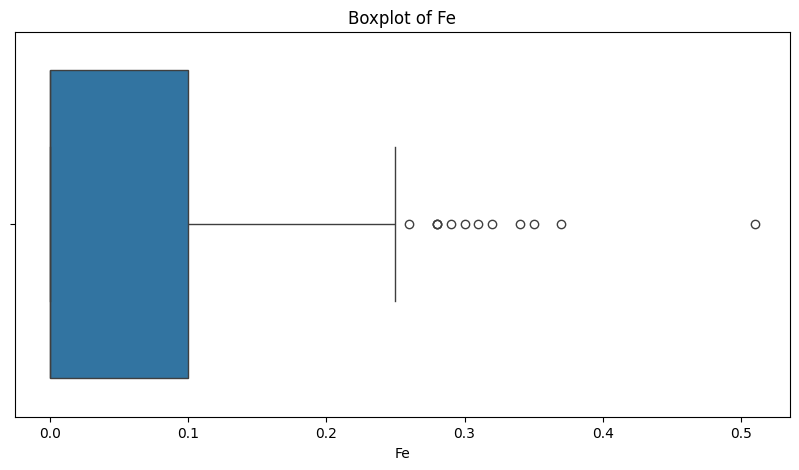

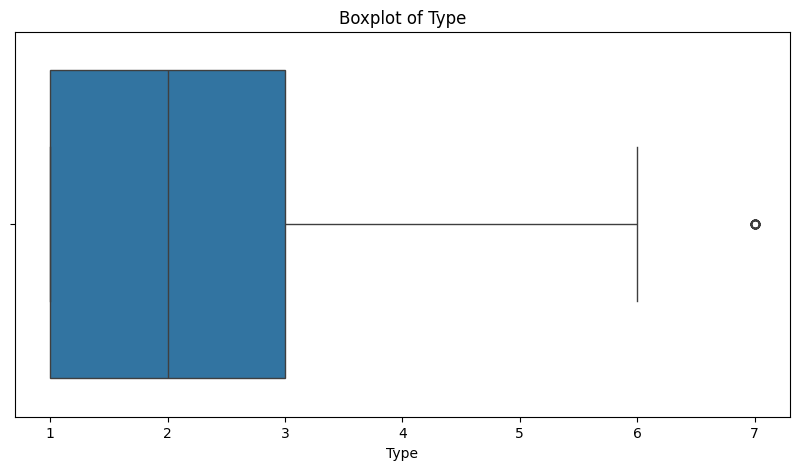

In [7]:
# Plotting boxplots for numerical features to identify outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# 2: Data Visualization:
### Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
### Analyze any patterns or correlations observed in the data.

### Histogram

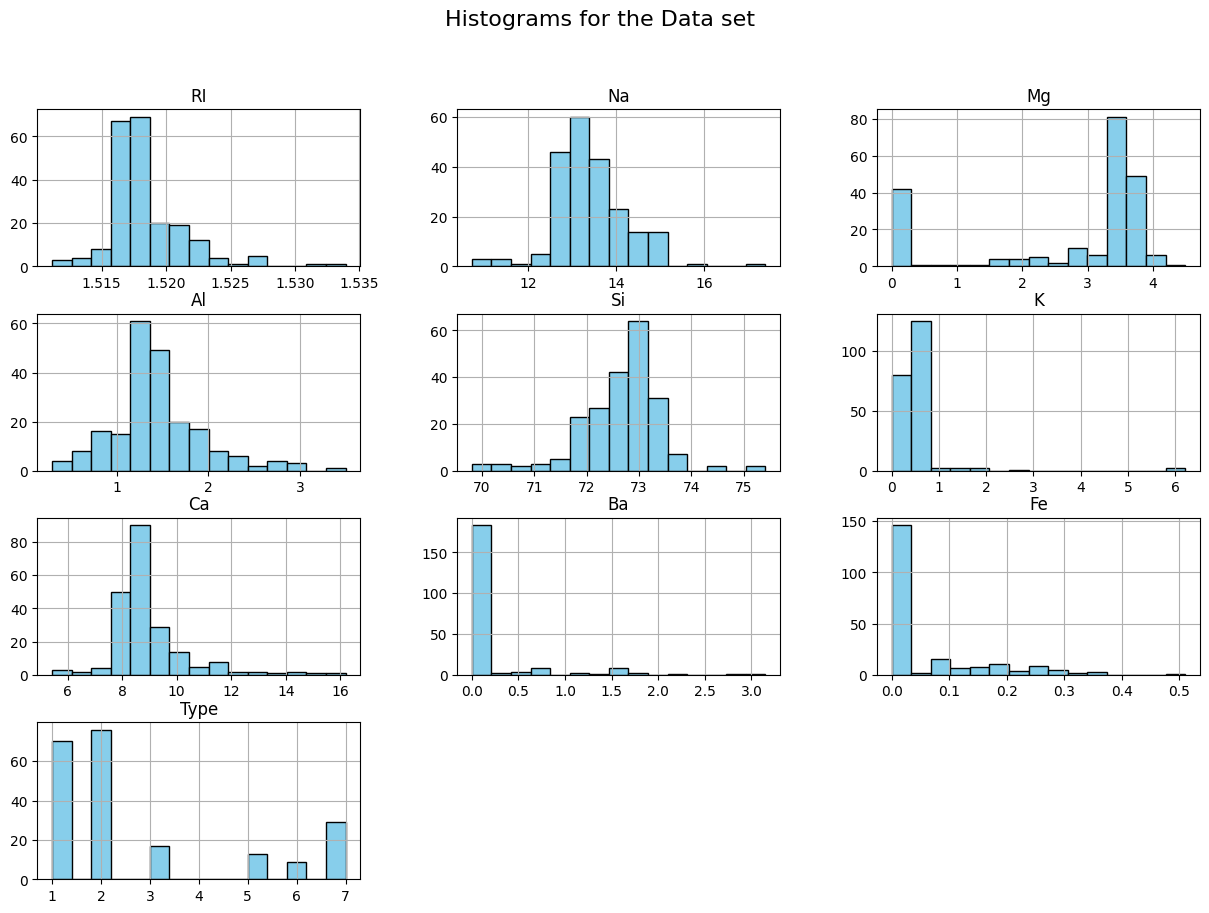

In [8]:
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for the Data set', fontsize=16)
plt.show()

### Pair Plot

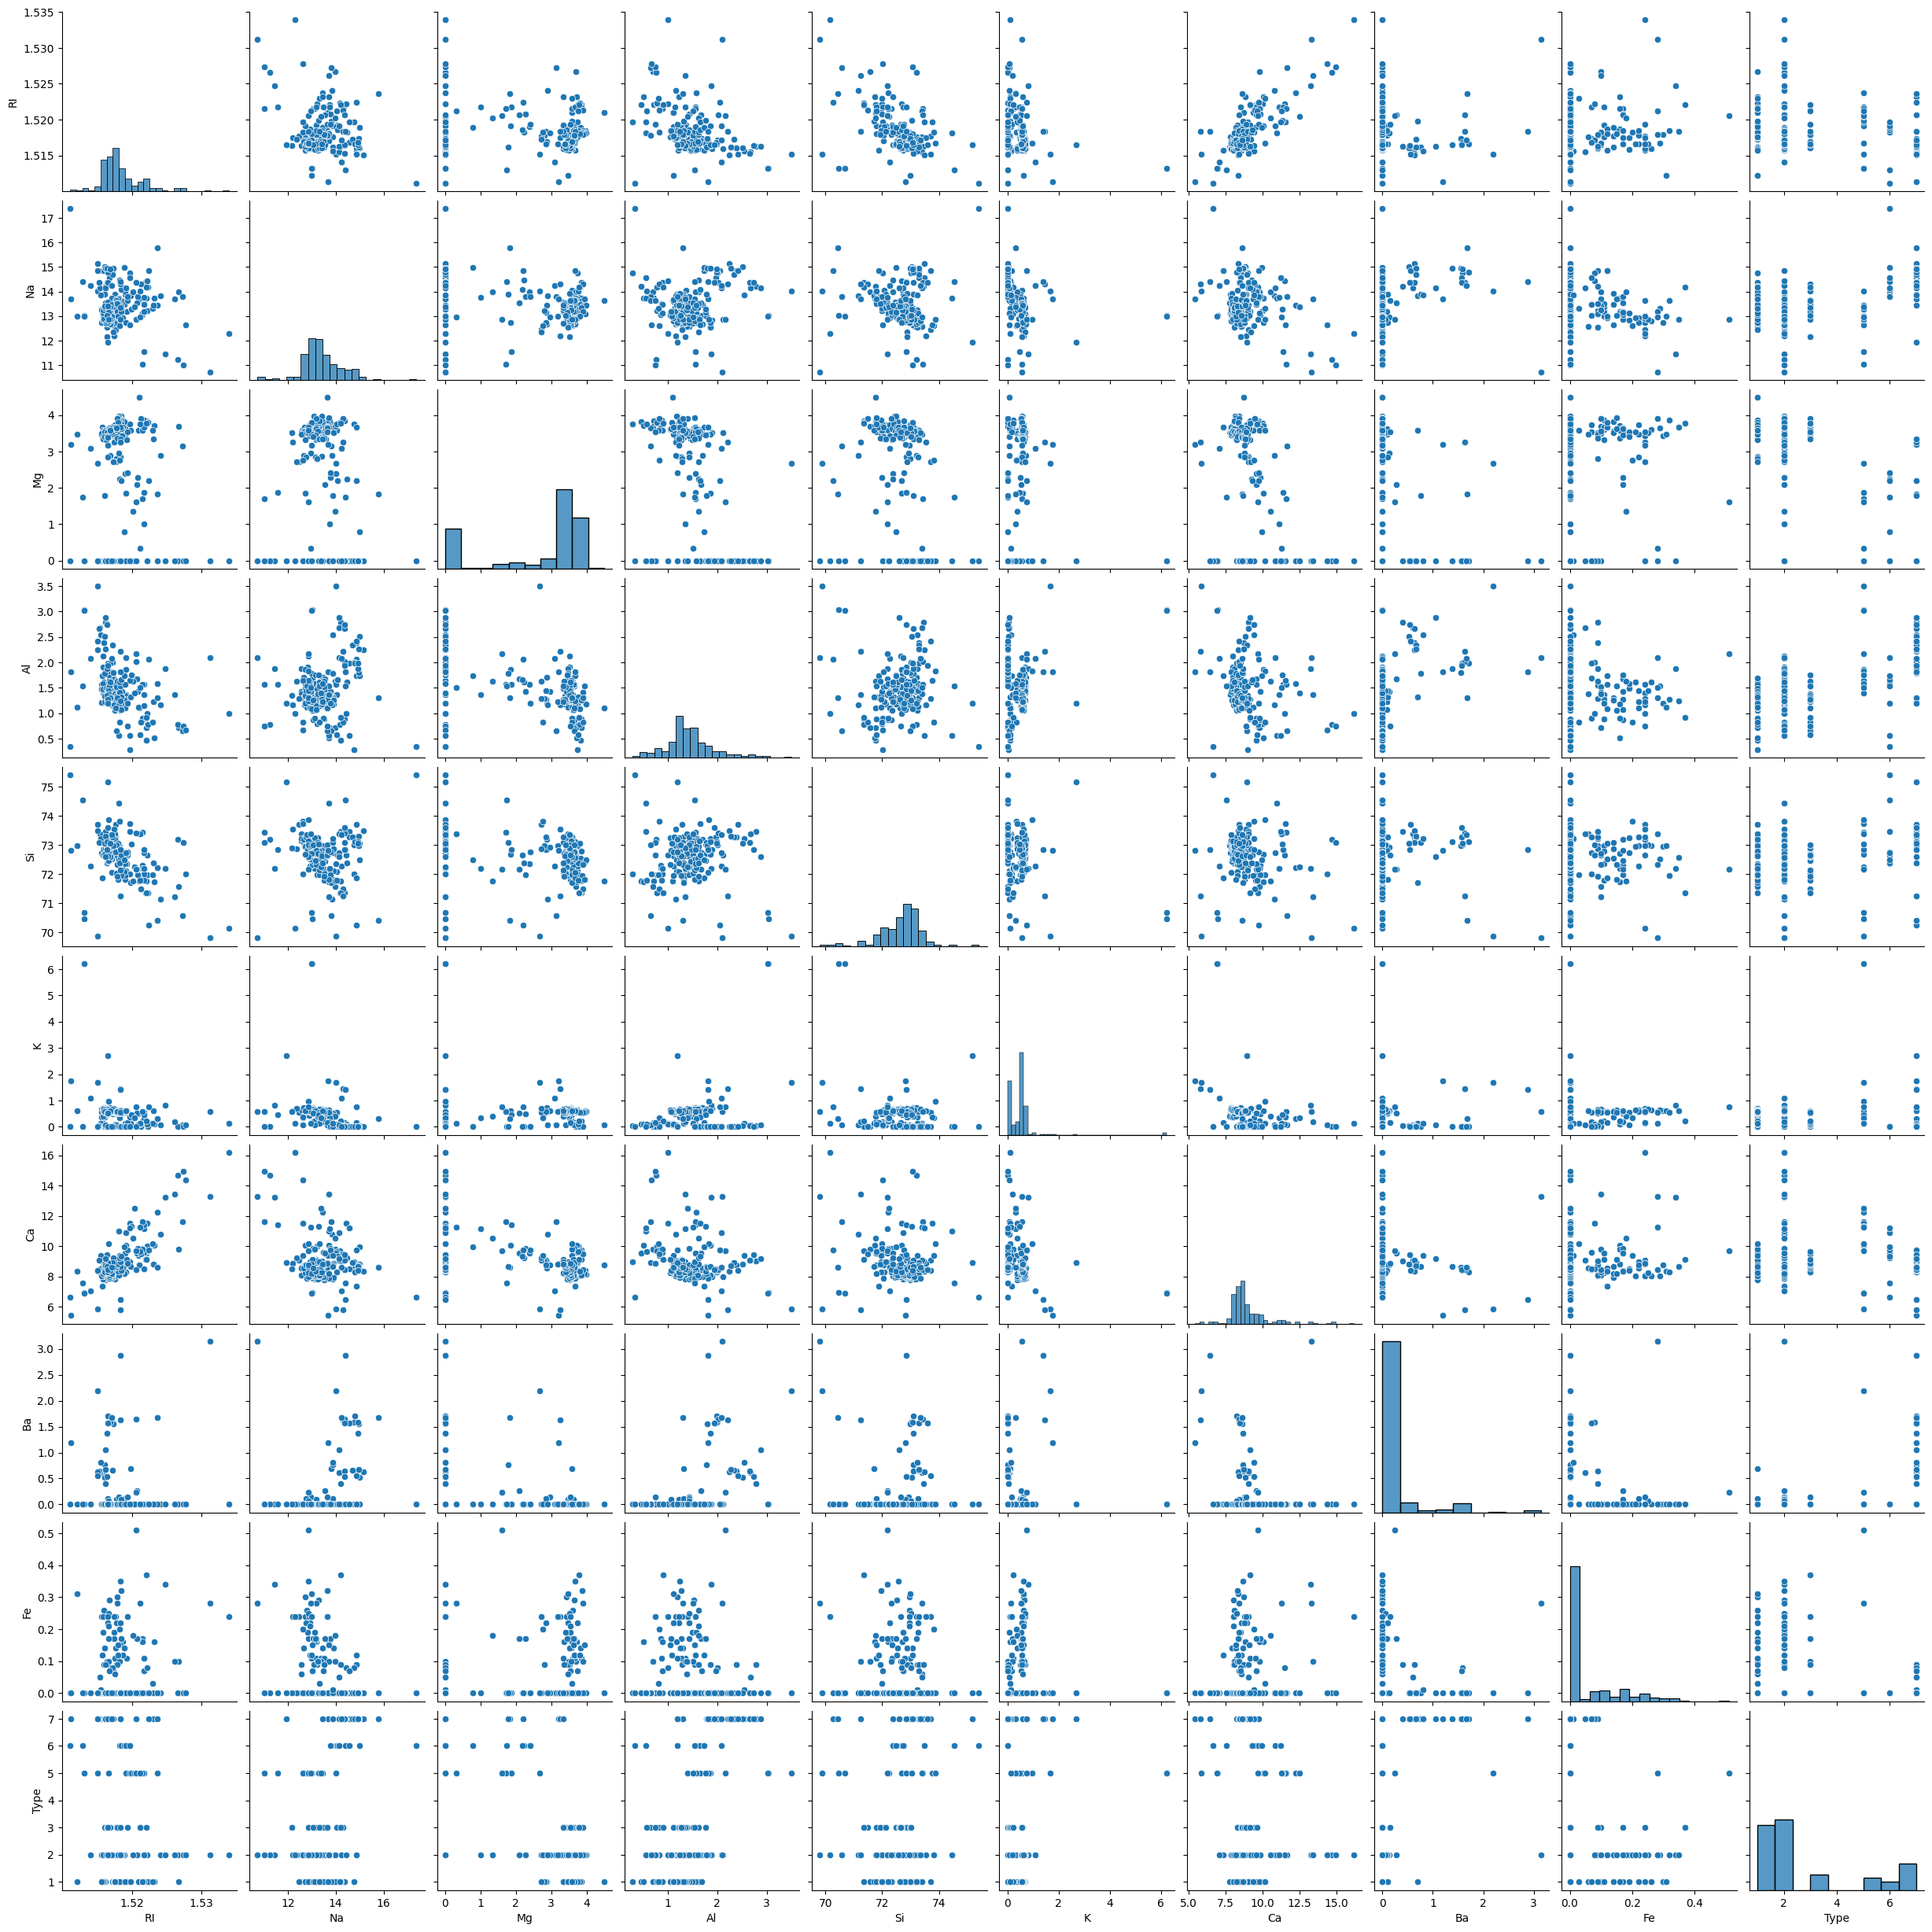

In [9]:
# Plotting pair plots for data set to observe relationships
sns.pairplot(df)
plt.show()

### Correlations Heatmap 

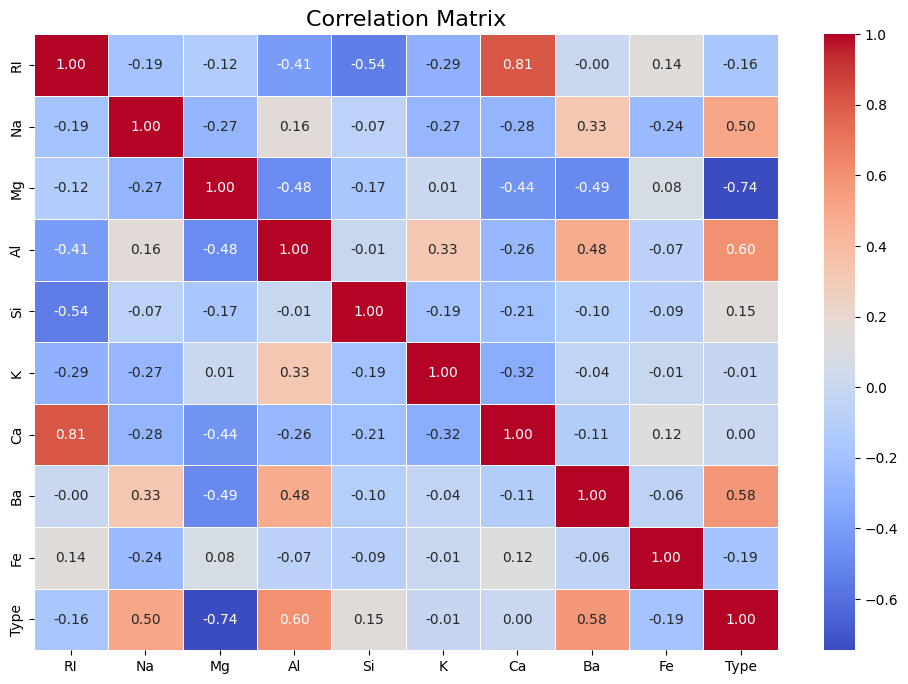

In [10]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# 3: Data Preprocessing

### 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

### 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
### 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [11]:
"""There are no missing values from the data set.
   And no Categorical Variables all coloums are numarical format"""

'There are no missing values from the data set.\n   And no Categorical Variables all coloums are numarical format'

In [12]:
# Apply standardization
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [13]:
df_scaler

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


In [14]:
# Apply normalization
scaler = MinMaxScaler()
df_normalizer = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
df_normalizer

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,1.0


In [16]:
class_distribution = df.columns.value_counts(normalize=True) * 100
print(class_distribution)

RI      10.0
Na      10.0
Mg      10.0
Al      10.0
Si      10.0
K       10.0
Ca      10.0
Ba      10.0
Fe      10.0
Type    10.0
dtype: float64


In [17]:
" The data set is well balanced "

' The data set is well balanced '

# 4: Random Forest Model Implementation
### 1. Divide the data into train and test split.
### 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
### 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [18]:
# Spliting the balanced dataset into features and target variable
X_balanced = df.drop('Type', axis=1)
y_balanced = df['Type']

# Spliting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Implementing the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [19]:
print("Random Forest - Accuracy  :", accuracy)
print("Random Forest - precision :", precision)
print("Random Forest - recall    :", recall)
print("Random Forest - f1        :", f1)

Random Forest - Accuracy  : 0.8372093023255814
Random Forest - precision : 0.8542214739205162
Random Forest - recall    : 0.8372093023255814
Random Forest - f1        : 0.835526738827564


# 5: Bagging and Boosting Methods
### Apply the Bagging and Boosting methods and compare the results.

### Bagging

In [20]:
# Initialize the base model
base_model = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier
bagging_classifier = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [21]:
print("Bagging - Accuracy  :", accuracy_bagging)
print("Bagging - Precision :", precision_bagging)
print("Bagging - Recall    :", recall_bagging)
print("Bagging - F1 Score  :", f1_bagging)

Bagging - Accuracy  : 0.813953488372093
Bagging - Precision : 0.8225232132208875
Bagging - Recall    : 0.813953488372093
Bagging - F1 Score  : 0.811869365598315


### Boosting

In [22]:
# Initialize the AdaBoost classifier
boosting_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42,algorithm='SAMME')

# Train the model
boosting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate performance
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted', zero_division=0)
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

In [23]:
print("Boosting - Accuracy  :", accuracy_boosting)
print("Boosting - Precision :", precision_boosting)
print("Boosting - Recall    :", recall_boosting)
print("Boosting - F1 Score  :", f1_boosting)

Boosting - Accuracy  : 0.4883720930232558
Boosting - Precision : 0.53446088794926
Boosting - Recall    : 0.4883720930232558
Boosting - F1 Score  : 0.5003281989328501


# Additional Notes:

### 1. Explain Bagging and Boosting methods. How is it different from each other.

In [24]:
""" Bagging is an ensemble learning model, where multiple week models are trained on different subsets of the training data. 
    Each subset is sampled with replacement and prediction is made by averaging the prediction of the week models for 
    regression problem and considering majority vote for classification problem.

    Boosting trains multiple based models sequentially. In this method, each model tries to correct the errors made by the previous models.
    Each model is trained on a modified version of the dataset, the instances that were misclassified by the previous models are given more
    weight. The final prediction is made by weighted voting. """

' Bagging is an ensemble learning model, where multiple week models are trained on different subsets of the training data. \n    Each subset is sampled with replacement and prediction is made by averaging the prediction of the week models for \n    regression problem and considering majority vote for classification problem.\n\n    Boosting trains multiple based models sequentially. In this method, each model tries to correct the errors made by the previous models.\n    Each model is trained on a modified version of the dataset, the instances that were misclassified by the previous models are given more\n    weight. The final prediction is made by weighted voting. '

### 2. Explain how to handle imbalance in the data.

In [25]:
""" There are several techniques that can be used to handle imbalanced data in a classification problem, such as collecting
    more data for the minority class, using stratified sampling, rebalancing the data, using a weighted loss function, 
    and using algorithms that are robust to imbalanced data. """

' There are several techniques that can be used to handle imbalanced data in a classification problem, such as collecting\n    more data for the minority class, using stratified sampling, rebalancing the data, using a weighted loss function, \n    and using algorithms that are robust to imbalanced data. '